# Desafio Jenny Belisario - 06 Enero 2022

## Primero se importan todas las librerias, para luego hacer la extraccion del archivo CSV, se procede a limpiar la data eliminando datos incosistentes (registros minimos como para despreciarla) para luego cambiar el tipo de dato de "objeto" a "flotante" en variables detectadas.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
pd.read_csv('result.csv', encoding='latin1',sep =';')

,metascore,name,console,userscore,date
0,97,Grand Theft Auto V,PS3,8.3,"Sep 17, 2013"
1,97,Grand Theft Auto V,X360,8.3,"Sep 17, 2013"
2,95,The Last of Us,PS3,9.2,"Jun 14, 2013"
3,94,BioShock Infinite,PS3,8.5,"Mar 26, 2013"
4,94,BioShock Infinite,PC,8.6,"Mar 25, 2013"
...,...,...,...,...,...
15642,38,Touhou Kobuto V: Burst Battle,Switch,4.6,"Oct 10, 2017"
15643,38,Randall,PS4,2.1,"Jun 6, 2017"
15644,36,Tokyo Tattoo Girls,VITA,5.4,"Nov 14, 2017"
15645,26,Road Rage,PS4,2.5,"Nov 14, 2017"


In [2]:
VideoJuego = pd.read_csv('result.csv', index_col=1, encoding='latin1',sep =';')

In [3]:
VideoJuego1= VideoJuego[ VideoJuego['userscore']!='tbd']

In [4]:
VideoJuego1['userscore']= VideoJuego1['userscore'].astype('float64')

<ipython-input-4-88995ba7ba12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VideoJuego1['userscore']= VideoJuego1['userscore'].astype('float64')


In [5]:
VideoJuego1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14274 entries, Grand Theft Auto V to Vroom in the Night Sky
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metascore  14274 non-null  int64  
 1   console    14274 non-null  object 
 2   userscore  14274 non-null  float64
 3   date       14274 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 557.6+ KB


In [6]:
VideoJuego1.head()

,metascore,console,userscore,date
name,,,,
Grand Theft Auto V,97,PS3,8.3,"Sep 17, 2013"
Grand Theft Auto V,97,X360,8.3,"Sep 17, 2013"
The Last of Us,95,PS3,9.2,"Jun 14, 2013"
BioShock Infinite,94,PS3,8.5,"Mar 26, 2013"
BioShock Infinite,94,PC,8.6,"Mar 25, 2013"


In [7]:
VideoJuego1.describe()

,metascore,userscore
count,14274.000000,14274.000000
mean,70.758232,7.028717
std,12.615941,1.360436
min,11.000000,0.200000
25%,64.000000,6.400000
50%,73.000000,7.300000
75%,80.000000,8.000000
max,98.000000,9.400000


## Visualizando la distribucion de la puntuacion metrica, mediante su frecuencia

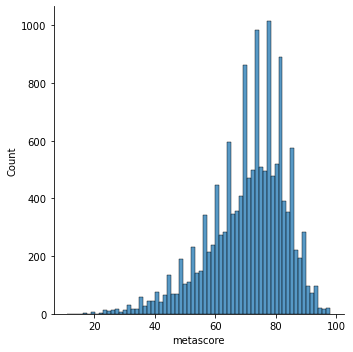

In [8]:
sb.displot(VideoJuego1['metascore'])

## Ahora se visualizara los 10 mejores y 10 peores juegos para toda las consolas, considerando el promedio de la puntuacion metrica (metascore)


In [9]:
#Los 10 mejores juegos para todas las consolas.
toptotal = VideoJuego1.groupby(by='name').mean()
toptotalUp =toptotal.sort_values('metascore',ascending=False)
toptotalUp.head(10)

,metascore,userscore
name,,
Red Dead Redemption 2,97.5,6.80
Super Mario Galaxy,97.0,9.00
Super Mario Odyssey,97.0,8.90
NFL 2K1,97.0,6.40
Metroid Prime,97.0,9.20
Super Mario Galaxy 2,97.0,9.10
Grand Theft Auto V,96.8,8.08
The Legend of Zelda: Breath of the Wild,96.5,8.35
The Legend of Zelda: The Wind Waker,96.0,8.90


In [10]:
#Los 10 peores juegos para todas las consolas.
toptotal = VideoJuego1.groupby(by='name').mean()
toptotalDown =toptotal.sort_values('metascore',ascending=True)
toptotalDown.head(10)

,metascore,userscore
name,,
Family Party: 30 Great Games Obstacle Arcade,11.000000,1.000000
Double Dragon II: Wander of the Dragons,17.000000,1.500000
Yaris,17.000000,4.200000
Vroom in the Night Sky,17.000000,3.100000
Ride to Hell: Retribution,17.500000,1.200000
SPOGS Racing,18.000000,3.600000
Alone in the Dark: Illumination,19.000000,1.200000
Deal or No Deal,20.000000,2.000000
Infestation: Survivor Stories The War Z,20.000000,1.700000


## Visualizando las consolas que recepcionaron los juego con mejor puntuacion metrica, se puede observar que las primeras 2 consolas que tiene mejor acogida con la puntuacion del juego es PC y N64, esta podria ser una "oportunidad de captacion venta marketing"


In [11]:
# consola que recepciono mejor puntuacion metrica
Dinamica = pd . pivot_table ( VideoJuego1 , index = [ "console" ], values = [ "metascore" ], aggfunc = np . mean )
Dinamica.sort_values('metascore',ascending=False)

,metascore
console,
PC,80.000000
DC,77.344086
N64,76.064516
Switch,73.669100
XONE,72.630556
WIIU,72.151351
GC,71.911688
XBOX,71.648690
PC,71.586544


## Graficando las consolas que recepcionaron los juego con mejor puntuacion metrica


<AxesSubplot:xlabel='console'>

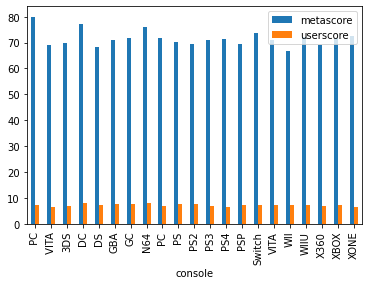

In [12]:
#Grafica consola que recepciono mejor puntuacion metrica
VideoJuego1.groupby(by='console').mean().plot(kind='bar')

## Creando categorizacion para cada consola


In [13]:
Consola1 = VideoJuego1[VideoJuego1["console"] == 'N64' ]
Consola2 = VideoJuego1[VideoJuego1["console"] == 'PS3' ]
Consola3 = VideoJuego1[VideoJuego1["console"] == 'X360' ]
Consola4 = VideoJuego1[VideoJuego1["console"] == 'XONE' ]
Consola5 = VideoJuego1[VideoJuego1["console"] == 'PS2' ]
Consola6 = VideoJuego1[VideoJuego1["console"] == 'PS4' ]
Consola7 = VideoJuego1[VideoJuego1["console"] == 'XBOX' ]
Consola8 = VideoJuego1[VideoJuego1["console"] == 'GC' ]
Consola9 = VideoJuego1[VideoJuego1["console"] == 'DC' ]
Consola10 = VideoJuego1[VideoJuego1["console"] == 'WII' ]

## Visualizacion de la puntuacion metrica de los diferentes juegos para el tipo de consola solo escoger el tipo de consola a ver, en este caso consola1 (N64)


<AxesSubplot:xlabel='name'>

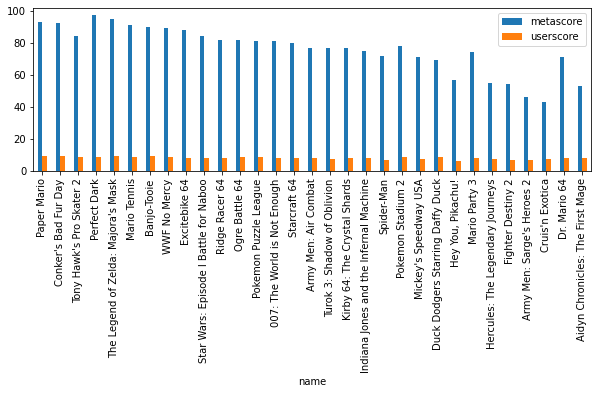

In [14]:
#mejores juegos basados en metascore para la consola N64
Consola1.plot(kind='bar',rot=90,figsize=(10,3))

## Visualizacion de la puntuacion metrica CONSOLA vs NAME


In [15]:
VideoJuego1.pivot_table(index = "console", columns = "name", aggfunc = {"metascore": sum},fill_value = 0)[:10]

metascore                                   \
name       #IDARB .detuned .hack//G.U. Last Recode   
console                                              
 PC             0        0                       0   
 VITA           0        0                       0   
3DS             0        0                       0   
DC              0        0                       0   
DS              0        0                       0   
GBA             0        0                       0   
GC              0        0                       0   
N64             0        0                       0   
PC              0        0                      69   
PS              0        0                       0   

                                                                   \
name    .hack//G.U. vol. 1//Rebirth .hack//G.U. vol. 2//Reminisce   
console                                                             
 PC                               0                             0   
 VITA                             0                             0   
3DS                               0                             0   
DC                                0                             0   
DS                                0                             0   
GBA                               0                             0   
GC                                0                             0   
N64                               0                             0   
PC                                0                             0   
PS                                0                             0   

                                                                \
name    .hack//G.U. vol. 3//Redemption .hack//Infection Part 1   
console                                                          
 PC                                  0                       0   
 VITA                                0                       0   
3DS                                  0                       0   
DC                                   0                       0   
DS                                   0                       0   
GBA                                  0                       0   
GC                                   0                       0   
N64                                  0                       0   
PC                                   0                       0   
PS                                   0                       0   

                                                       \
name    .hack//Mutation Part 2 .hack//Outbreak Part 3   
console                                                 
 PC                          0                      0   
 VITA                        0                      0   
3DS                          0                      0   
DC                           0                      0   
DS                           0                      0   
GBA                          0                      0   
GC                           0                      0   
N64                          0                      0   
PC                           0                      0   
PS                           0                      0   

                                  ...                        \
name    .hack//Quarantine Part 4  ... inFamous: First Light   
console                           ...                         
 PC                            0  ...                     0   
 VITA                          0  ...                     0   
3DS                            0  ...                     0   
DC                             0  ...                     0   
DS                             0  ...                     0   
GBA                            0  ...                     0   
GC                             0  ...                     0   
N64                            0  ...                     0   
PC                             0  ...                     0   
PS                             0  ...             

## Visualizacion de la puntuacion metrica de los 10 mejores juegos para el tipo de Consola que se desee ver, solo hay que cambiar en el dataframe : Dinamica, por ejemplo para la Consola3 (X360) el juego valorado con mejor puntuacion metrica (metascore) fue "Grand Theft Auto IV" con 98


In [16]:
#Los 10 mejores juegos para las consola con eleccion
Dinamica = pd . pivot_table ( Consola3, index = [ "console" , "name" ], values = [ "metascore" ], aggfunc = np . mean )
Orden = Dinamica.sort_values('metascore',ascending=False)
Orden.head(10)

metascore
console name                                     
X360    Grand Theft Auto IV                    98
        Grand Theft Auto V                     97
        BioShock                               96
        The Elder Scrolls V: Skyrim            96
        Mass Effect 2                          96
        The Orange Box                         96
        Portal 2                               95
        Red Dead Redemption                    95
        The Elder Scrolls IV: Oblivion         94
        Call of Duty: Modern Warfare 2         94

## Visualizacion de la puntuacion metrica de los 10 peores juegos para el tipo de Consola que se desee ver, solo hay que cambiar en el dataframe : Dinamica, por ejemplo para la Consola1 (N64) el juego valorado con peor puntuacion metrica (metascore) fue "Rally Challenge 2000" con 41


In [17]:
#Los 10 peores juegos para las consola con eleccion
Dinamica = pd . pivot_table ( Consola4, index = [ "console" , "name" ], values = [ "metascore" ], aggfunc = np . mean )
Orden = Dinamica.sort_values('metascore',ascending=True)
Orden.head(10)

metascore
console name                                   
XONE    Fighter Within                       23
        Soda Drinker Pro                     30
        Giana Sisters: Dream Runners         32
        Ghostbusters                         32
        Gene Rain                            32
        Agony                                34
        Past Cure                            34
        7 Days to Die                        35
        NBA Live 14                          36
        Project Root                         38

## Se muestra un grafico de puntos que relaciona la puntuacion metrica (metascore) del juego y el puntuaje del usuario (userscore) para todas las consolas


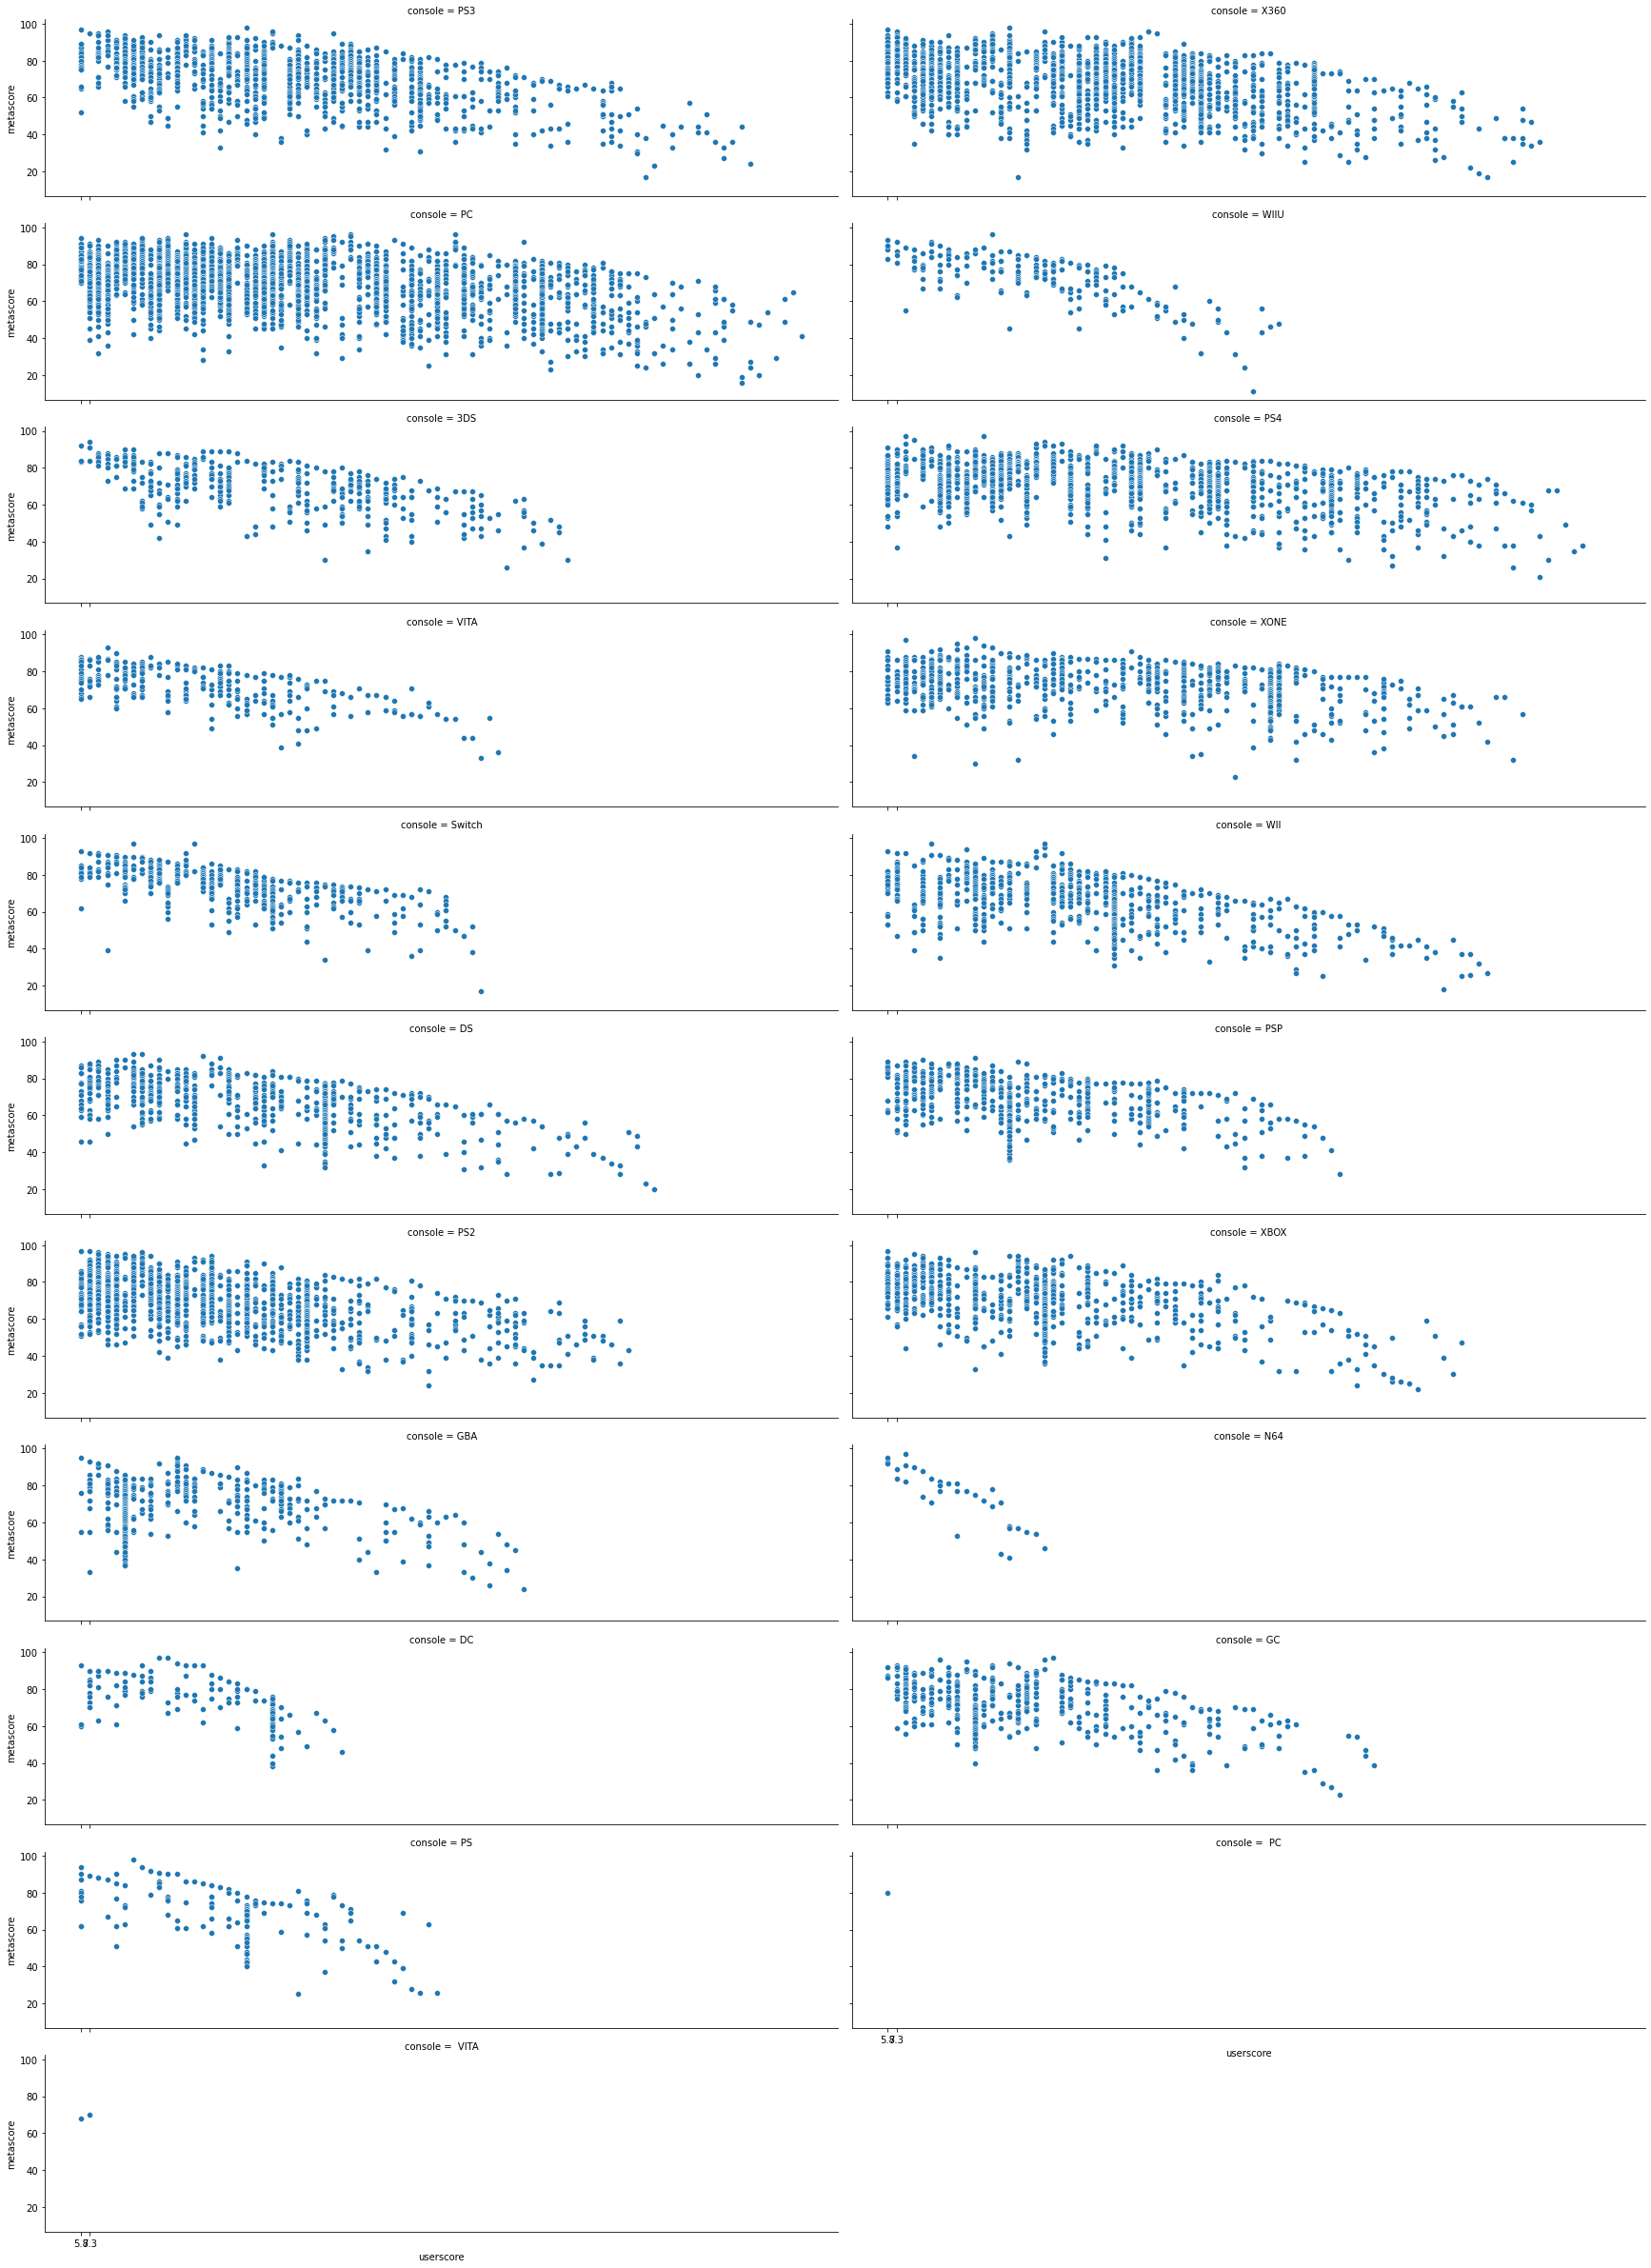

In [18]:
sb.relplot(x='userscore', y='metascore', data=VideoJuego, col="console", col_wrap=2, height = 3, aspect = 4)

## Realizando limpieza en cuando a los datos de "usercore" y convertirlo en data netablemte float64, podremos hacer una correlacion con la variable "metascore" y asi verificar si hay alguna relacion cercana entre ellos, el cual arroja un resultado de 0.56.

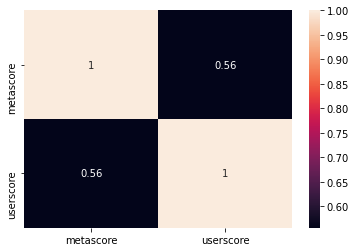

In [19]:
correlation_mat = VideoJuego1.corr()
sb.heatmap(correlation_mat, annot = True)
plt.show()

In [20]:
VideoJuego1.corr()

,metascore,userscore
metascore,1.000000,0.555888
userscore,0.555888,1.000000


## ¿Qué pasa con la relación entre metascore y userscore? en este caso el coeficiente de correlación de Pearson es de 0.56, vemos dispersion en la grafica, inidcandonos que no necesariamente tendra un alto userscore con una alta puntuacion metrica.

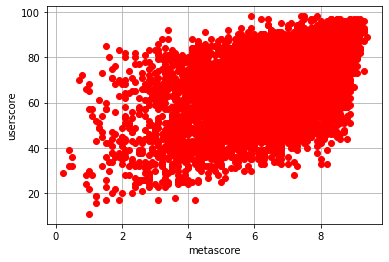

In [21]:
plt.plot(VideoJuego1 ["userscore"], VideoJuego1 ["metascore"], "ro")
plt.ylabel ("userscore")
plt.xlabel ("metascore")
plt.grid()
plt.show()